# 1) 날씨 데이터셋을 다운 받고 1시간 단위로 서브 샘플링하시오.

In [38]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [39]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

- 데이터 셋에는 대기 온도, 대기압 및 습도와 같은 14가지 변수들이 있다.

In [40]:
df = pd.read_csv(csv_path)
print("데이터의 구성 : ", df.shape)

# 현재의 데이터는 10분 단위로 구성되어 있다. 1시간 단위로 서브 샘플링을 진행한다.
df.head(10)

데이터의 구성 :  (420551, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [41]:
# 6번째 레코드부터 시작해서 매 6번째 레코드를 선택하여 1시간 단위의 값을 출력함
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# index를 통해 1시간 단위로 값이 출력되었음을 확인함
df.head(10)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
35,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
41,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
47,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
53,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2
59,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6


In [42]:
# 아래에서도 서브 샘플링이 잘 되었음을 확인할 수 있다.
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

# 2) 결측이나 오류 값에 대해 적절히 전처리하고 관련 설명을 주석으로 추가하시오.

In [43]:
# 데이터의 형태 살펴보기
# 서브 샘플링 전에는 420551행으로 구성되었으나 70991행으로 데이터의 크기가 감소했다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         70091 non-null  float64
 1   T (degC)         70091 non-null  float64
 2   Tpot (K)         70091 non-null  float64
 3   Tdew (degC)      70091 non-null  float64
 4   rh (%)           70091 non-null  float64
 5   VPmax (mbar)     70091 non-null  float64
 6   VPact (mbar)     70091 non-null  float64
 7   VPdef (mbar)     70091 non-null  float64
 8   sh (g/kg)        70091 non-null  float64
 9   H2OC (mmol/mol)  70091 non-null  float64
 10  rho (g/m**3)     70091 non-null  float64
 11  wv (m/s)         70091 non-null  float64
 12  max. wv (m/s)    70091 non-null  float64
 13  wd (deg)         70091 non-null  float64
dtypes: float64(14)
memory usage: 7.5 MB


In [44]:
# 데이터의 결측치 확인한다. 정제된 본 데이터의 결측치는 존재하지 않는다.
columns_ = df.columns.tolist()

for column in columns_:
    print(f'column : {column}의 결측치 개수 : ', df[column].isnull().sum(),
         ' / 데이터 타입 : ', df[column].dtype)

column : p (mbar)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : T (degC)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : Tpot (K)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : Tdew (degC)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : rh (%)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : VPmax (mbar)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : VPact (mbar)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : VPdef (mbar)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : sh (g/kg)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : H2OC (mmol/mol)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : rho (g/m**3)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : wv (m/s)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : max. wv (m/s)의 결측치 개수 :  0  / 데이터 타입 :  float64
column : wd (deg)의 결측치 개수 :  0  / 데이터 타입 :  float64


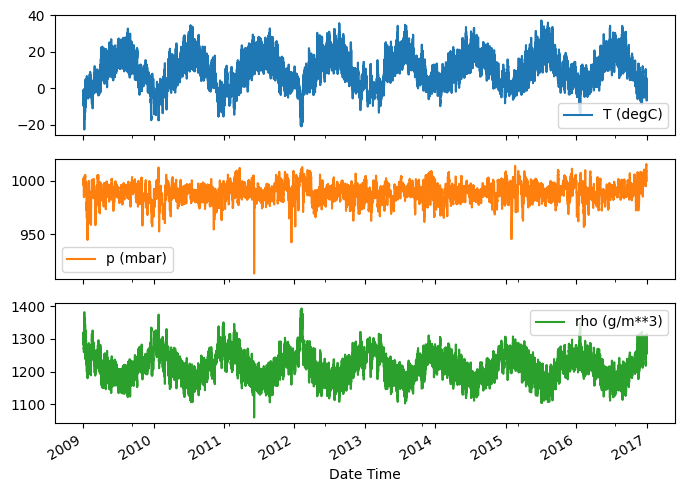

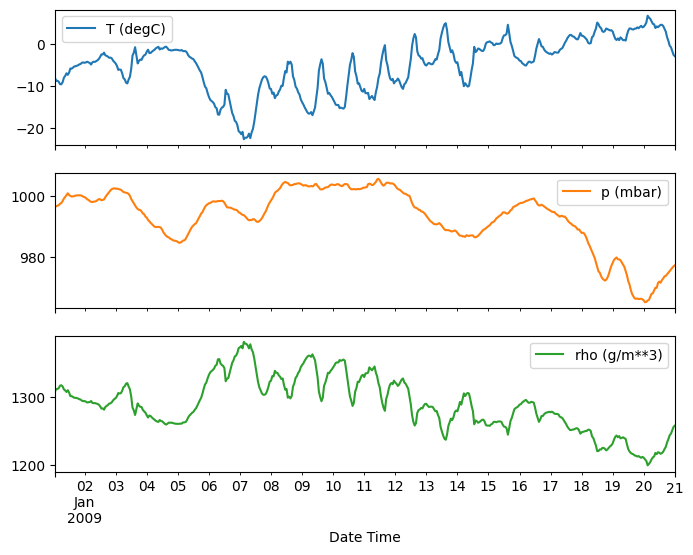

In [45]:
# 주요 피쳐별 시계열에 따른 값의 분포 확인
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [46]:
# 변수 기초통계량 확인
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,1.702567,2.963041,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,65.447512,75.597657,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


In [47]:
# 풍속의 최저가 0이 아니라 -9999로 출력되는 이상치가 발견됨
wv = df['wv (m/s)']
wv.sort_values(ascending=False)

61025       14.01
61019       13.50
253811      13.08
268505      12.54
274721      12.21
           ...   
4007         0.00
64253        0.00
343595   -9999.00
343589   -9999.00
343583   -9999.00
Name: wv (m/s), Length: 70091, dtype: float64

In [48]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# 최소값을 -9999에서 0으로 변환함
df['wv (m/s)'].min()

0.0

# 3) 특성 엔지니어링을 수행하여 바람, 시간에 대해 적절히 처리하고 관련 설명을 주석으로 추가하시오

## - 먼저 바람의 방향, 바람의 속도와 관련된 피쳐를 시각화하여 데이터의 분포를 확인한다

Text(0, 0.5, 'Wind Velocity [m/s]')

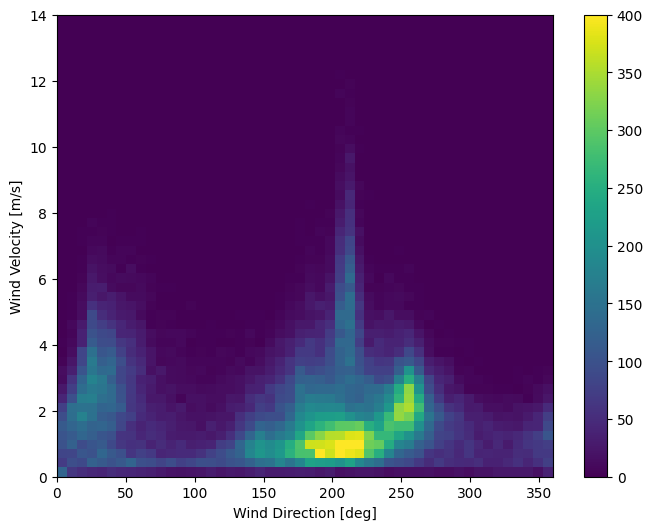

In [49]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

- 풍향과 속도 열을 추출하여 바람 벡터로 변환한다

In [50]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)')*np.pi / 180

df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.30551397313467, 8.244699285490789, -8.274385403355149, 7.733831295546778)

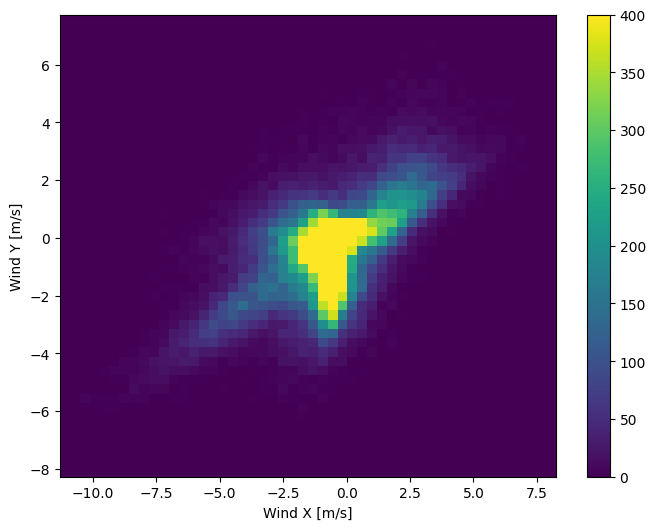

In [51]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

## - 다음으로 시간과 관련된 피쳐를 분석을 위해 변환한다

In [52]:
# 기존 형태
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

In [16]:
# 초 단위로 변환
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

In [17]:
# 사인 및 코사인 변환을 사용하여 초 단위의 값을 변환함
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

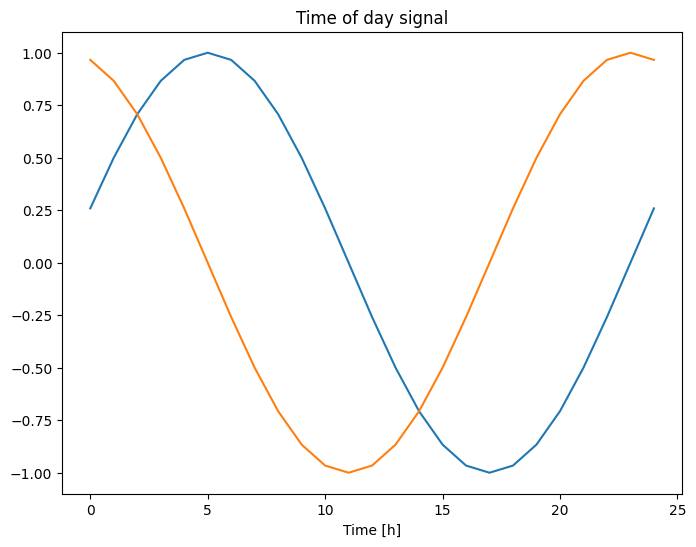

In [18]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

푸리에 변환은 시간이나 공간에서 샘플링된 신호를 시간 주파수 또는 공간 주파수에서 샘플링된 동일한 신호로 변환하는 수학적 공식이다. 신호 처리에서 푸리에 변환은 신호의 중요한 특성, 즉 주파수 성분을 나타낼 수 있다.

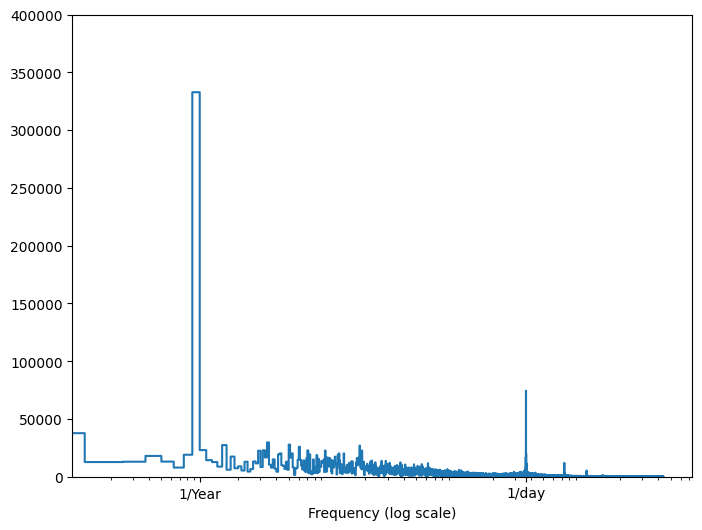

In [19]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# 4) 데이터 분할 및 정규화를 수행하고 관련 설명을 주석으로 추가하시오

- 훈련, 검증, 테스트 데이터의 비율을 7:2:1로 분할한다.
- 시계열 데이터의 특성을 살릴 수 있도록 데이터프레임의 처음부터 일정 비율을 분할해서 할당한다
  - 이를 통해 시간 순서상 앞부분의 데이터를 학습시켜 최신의 데이터로 검증, 테스트를 진행한다.

In [20]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [21]:
train_mean = train_df.mean()
train_std = train_df.std()

# 정규화를 위해 (x-m)\std 공식에 대입
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

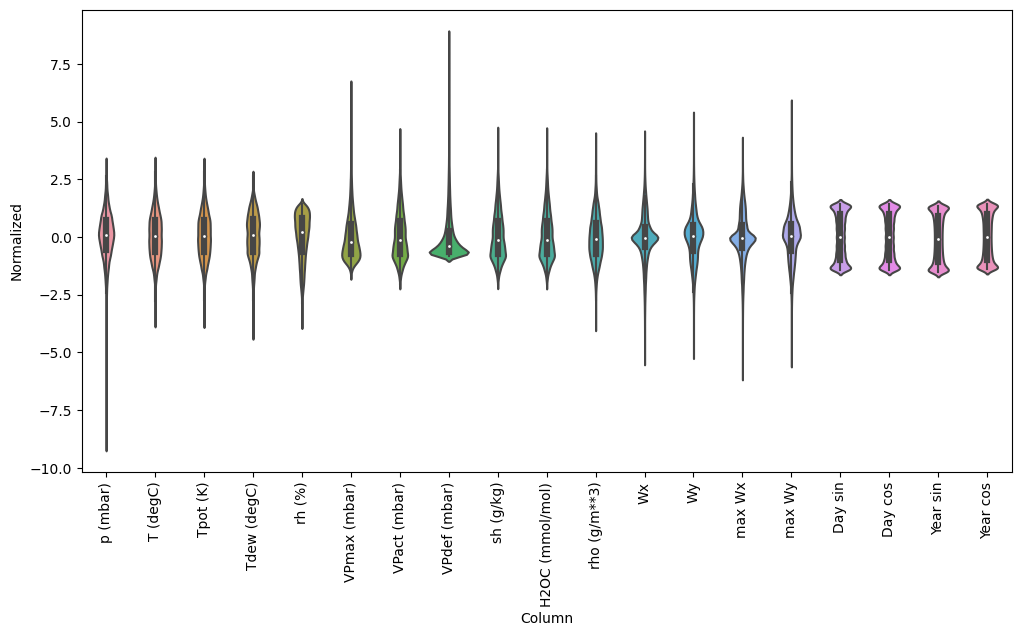

In [22]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

# 변수별 계산된 정규화 값을 시각화
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

-9999와 같은 이상치를 제거해주었기에 정규화가 잘 수행되었음을 확인할 수 있다.

# 5) 데이터 창 작업을 수행하고 관련 설명을 주석으로 추가하시오

## 인덱스 및 오프셋
- 데이터 창 작업을 통해 구축한 모델을 재사용한다
- window generator를 통해 데이터를 일정한 크기의 창(window)로 나눈다. 이를 통해 시간에 따른 패턴 파악에 유리하다

In [23]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # raw data를 저장합니다.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # 레이블 열 인덱스 계산하기
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # 데이터 창의 파라미터를 정의
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

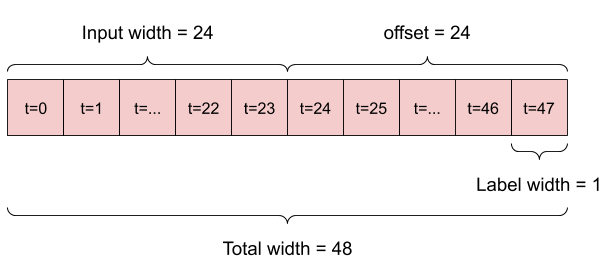

In [24]:
# 위의 그림과 같이 24시간의 input이 주어졌을 때, 향후  24시간의 미래를 단일 예측하는 창을 정의함
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

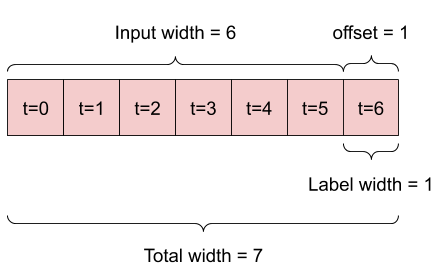

In [25]:
# 위의 그림과 같이 6시간의 input이 주어졌을 때, 향후 1시간의 미래를 단일 예측하는 창을 정의함
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

## 분할
- 이 메서드는 주어진 데이터의 Feature를 입력과 레이블로 나누는 역할을 한다.

In [26]:
def split_window(self, features) :
  # 입력 데이터와 레이블 데이터를 추출한다.
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]

  # 레이블 컬럼이 지정되어 있는 경우 해당 컬럼만 추출한다
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # 슬라이싱은 정적인 형태의 정보를 보존하지 않기에 수동으로 형태를 설정
  # 이를 통해 `tf.data.Datasets`가 얼마나 잘 작동하는지 더 쉽게 확인 가능함
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [27]:
# 전체 윈도우 크기에 해당하는 3개의 슬라이스를 쌓는다
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

# 윈도우를 입력과 레이블로 나눠주고 결과를 출력한다
example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


- 각각의 구성 요소는 배치 크기, 시간 축, 피처 축을 의미한다
- example_window는 전체 데이터를 표현하는 윈도우이다
- example_inputs는 example_window에서 입력 데이터에 해당한다
  - input의 경우 맨 처음 6개의 time step을 의미한다.
- example_labels는 example_window에서 정답에 해당하는 레이블에 해당한다
  - label의 경우 맨 마지막 1개의 time step을 의미한다.

## 플롯하기

In [28]:
w2.example = example_inputs, example_labels

In [29]:
print(f'example_inputs shape: {example_inputs.shape}')
print(f'example_labels shape: {example_labels.shape}')

example_inputs shape: (3, 6, 19)
example_labels shape: (3, 1, 1)


In [30]:
# example_inputs와 example_labels를 따로 슬라이싱하여 첫 번째 텐서를 확인해보았다.
first_input_batch = example_inputs[0, :, :].numpy()
first_label_batch = example_labels[0, :, :].numpy()

# 결과 출력
print('First Input Batch:')
print(first_input_batch)

print('\nFirst Label Batch:')
print(first_label_batch)

First Input Batch:
[[ 9.45307599e-01 -1.98247323e+00 -2.04188844e+00 -1.91897277e+00
   1.11710152e+00 -1.30285119e+00 -1.47732321e+00 -7.90423621e-01
  -1.48003637e+00 -1.48269721e+00  2.21852381e+00  1.93409239e-01
   2.21161294e-01  1.11140455e-01  2.17927873e-01  3.66110559e-01
   1.36606880e+00 -6.10523600e-02  1.42843408e+00]
 [ 9.59769847e-01 -2.07837211e+00 -2.13816632e+00 -2.06096373e+00
   1.04461734e+00 -1.33014257e+00 -1.53435391e+00 -7.86272298e-01
  -1.53618981e+00 -1.53903452e+00  2.32570755e+00  1.72986774e-01
   2.22100866e-01  1.09458245e-01  2.27798499e-01  7.07199726e-01
   1.22479437e+00 -6.00293506e-02  1.42842359e+00]
 [ 9.86283967e-01 -2.07028426e+00 -2.13243549e+00 -2.04518696e+00
   1.06273839e+00 -1.32884298e+00 -1.52722507e+00 -7.88347960e-01
  -1.52870268e+00 -1.53199235e+00  2.32399847e+00  2.07982702e-01
   2.76266015e-01  1.11218051e-01  3.24078416e-01  1.00009963e+00
   1.00005921e+00 -5.90063492e-02  1.42841238e+00]
 [ 1.00436178e+00 -2.09801405e+00 -2

In [31]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

시간에 따른 데이터의 추이를 시각적으로 확인하고, 입력 데이터에 사용되는 실제 label을 별도의 형태로 표기해주었다.

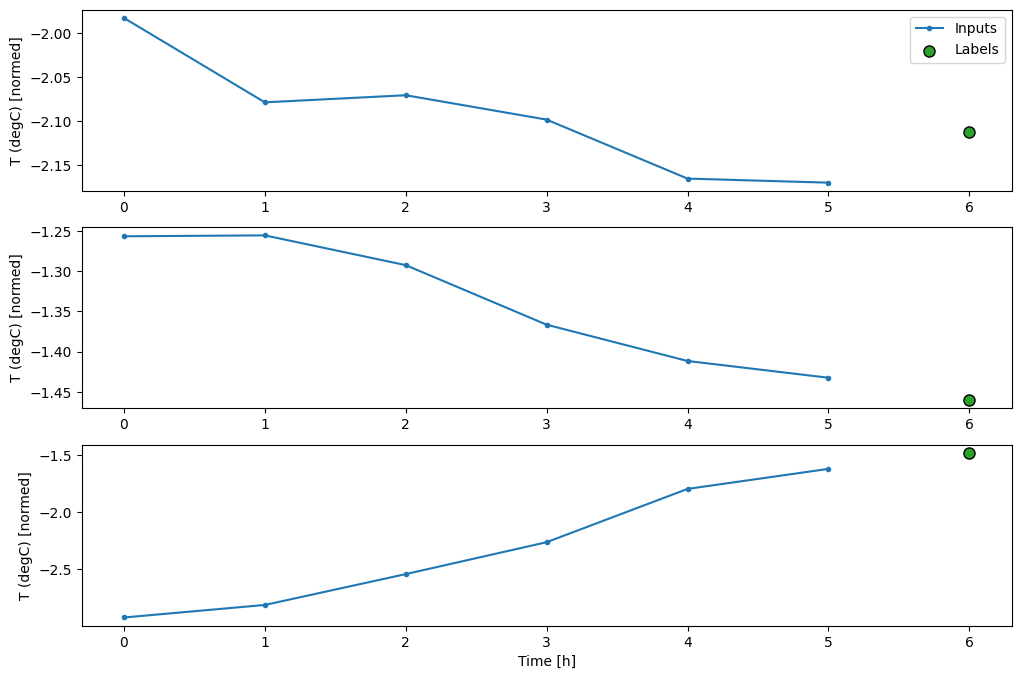

In [32]:
w2.plot()

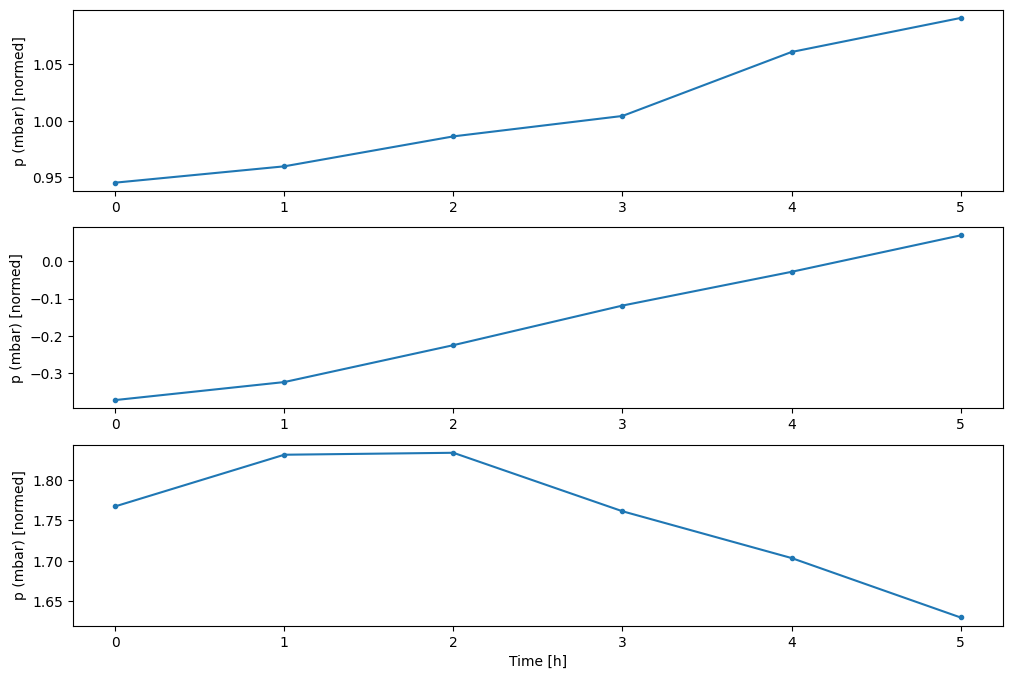

In [33]:
w2.plot(plot_col='p (mbar)')

make_dataset 메서드는 시계열 DataFrame을 tf.keras.utils.timeseries_dataset_from_array 함수를 통해 (input_window, label_window)의 한 쌍으로 구성된 데이터셋으로 변환한다.

In [34]:
def make_dataset(self, data):
  # 입력 데이터를 넘파이 배열로 변환하고 type은 float32로 지정
  data = np.array(data, dtype=np.float32)

  # 텐서플로에 내장된 함수 기능을 사용하여 시계열 데이터셋을 생성함
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data, # 시계열 데이터
      targets=None, # 레이블(타깃값)은 여기서는 사용하지 않음
      sequence_length=self.total_window_size, # 각 샘플의 시퀀스 길이
      sequence_stride=1, # 시퀀스 간의 간격
      shuffle=True, # 데이터를 섞을지 여부
      batch_size=32,) # 배치 크기

  # 생성된 데이터셋에 기존에 만든 split_window 메서드를 적용하여 입력과 레이블로 분할함
  ds = ds.map(self.split_window)

  # 처리 완료된 데이터셋 반환
  return ds

WindowGenerator.make_dataset = make_dataset

- make_dataset 메서드를 활용하여 tf.data.Dataset으로 액세스하기 위한 속성을 추가한다

In [35]:
@property
def train(self):
  # train 데이터프레임을 활용하여 데이터셋을 생성
  return self.make_dataset(self.train_df)

@property
def val(self):
  # val(검증용) 데이터프레임을 활용하여 데이터셋을 생성
  return self.make_dataset(self.val_df)

@property
def test(self):
  # test 데이터프레임을 활용하여 데이터셋을 생성
  return self.make_dataset(self.test_df)

@property
def example(self):
  # '_example' 속성에서 캐시된 결과를 가져옴
  result = getattr(self, '_example', None)
  if result is None:
    # 캐시된 결과가 없으면 '.train' 데이터셋에서 하나의 배치를 가져옴
    result = next(iter(self.train))
    # 추후 활용을 위해 캐시를 저장함
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [36]:
# w2.train 데이터셋을 각 요소가 (inputs, label) 쌍으로 구성되며 두 데이터의 형태는 아래와 같다
# label 데이터의 경우 2, 3번째 차원이 각각 1로 레이블이 스칼라값임을 의미한다
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

- 각 배치에는 32개의 시계열 데이터가 있으며, 각 시계열 데이터는 6개의 시간 스텝으로 이루어져 있음
- 입력 데이터는 각 시간 스텝에서 19개의 feature를 가지고 있고, 레이블은 스칼라 값으로 Feature가 1개이다

In [37]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


# 6) 단일 스텝 모델을 선형, 다중 스텝 밀집, 컨볼루션 신경망, 순환 신경망, 다중 출력 모델 등으로 구성하여 실행시켜보고 관련 설명을 주석으로 추가하시오
- 1 Time step 이후의 'T (degC)' 섭씨 온도를 예측하는 단일 스텝 모델을 구축함
  - 입력 윈도우와 레이블 윈도우의 폭이 1 time step만을 대상으로 하고 있다.
- shift=1은 윈도우를 이동시키는 값으로, 1 타임 스텝씩 이동한다.

In [53]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    # 온도 예측을 위한 컬럼을 설정한다
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [54]:
# train 데이터셋에서 하나의 배치를 가져와서 inputs와 labels의 shape를 출력한다
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [55]:
# 현재 타임 스텝의 온도를 레이블로 사용하여 예측하는 모델
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

모델을 인스턴스화하고 평가를 진행했다. 평가 단위는 출력된 바와 같이 MAE를 사용했다. 그러나 이는 매우 간단한 베이스라인 모델이기에 더 높은 성능을 위해 모델의 훈련을 보다 효과적으로 실시해야만 한다. 현재 모델의 윈도우의 크기가 1 밖에 안된다. 따라서 윈도우의 크기를 늘린다면 효과적인 학습이 가능할 것이다.

In [56]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 4s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0785


윈도우의 크기를 24로 확장하여 한 번에 24시간 연속 입력 및 레이블 창을 생성하는 보다 넓은 WindowGenerator를 생성했다. 동일하게 단일 입력 타임스텝을 기반으로 1시간 후의 미래의 온도를 예측한다.

In [57]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

처음에 width를 1로 각각 설정했을 때 Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)가 출력됐었는데, time 값이 1에서 24로 변경된 것을 확인 가능하다.

In [58]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


앞서 만든 플롯 메서드를 활용하여 단일 스텝 모델을 통한 예측을 시각화하였다. 온도를 나타내는 차트이며, Labels와 Prediction의 거리가 가까울수록, 그림 상에는 포개져있을 경우 가장 예측이 잘 수행된 것이다.

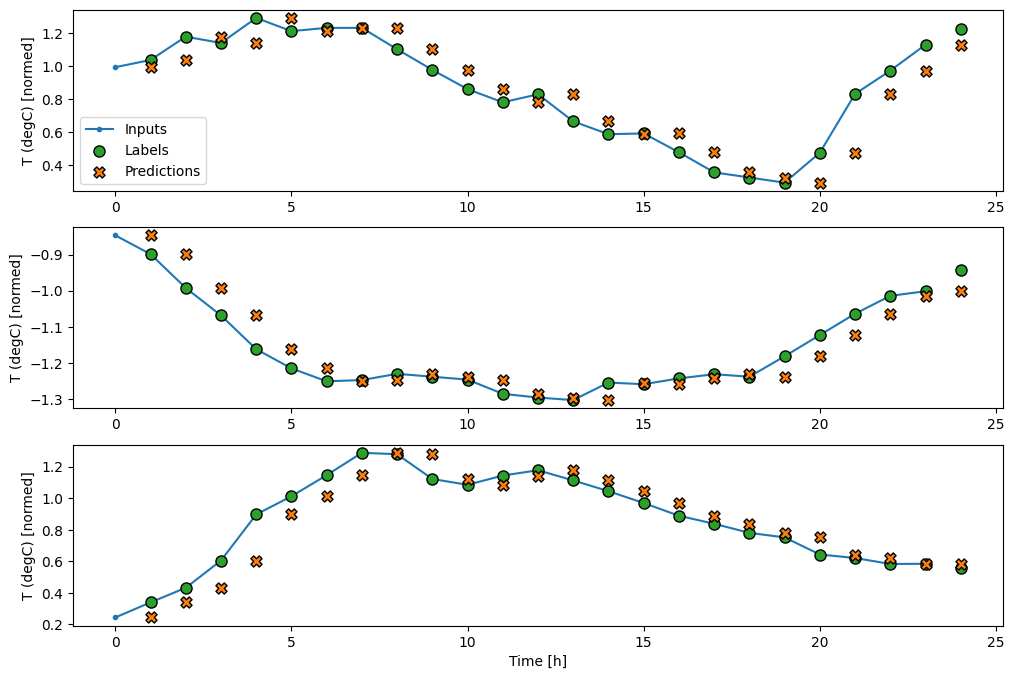

In [59]:
wide_window.plot(baseline)

## 선형 모델
- 가장 간단한 선형 모델부터 실시한다.

In [60]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [61]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [62]:
# 훈련 절차를 하나의 함수 패키지로 만들었다
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [63]:
# 모델을 훈련하고 성능을 평가한다
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 20s 12ms/step - loss: 0.1260 - mean_absolute_error: 0.2086 - val_loss: 0.0131 - val_mean_absolute_error: 0.0840
Epoch 2/20
1534/1534 [==============================] - 10s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0805 - val_loss: 0.0102 - val_mean_absolute_error: 0.0737
Epoch 3/20
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0741 - val_loss: 0.0094 - val_mean_absolute_error: 0.0709
Epoch 4/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0716 - val_loss: 0.0091 - val_mean_absolute_error: 0.0690
Epoch 5/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0703 - val_loss: 0.0089 - val_mean_absolute_error: 0.0688
Epoch 6/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0699 - val_loss: 0.0087 - val_mean_absolute_error: 0.0681
E

에포크가 20회 모두 실시되지 않고 10번째에 조기 종료되었다. 손실 값은 0.0087, MAE 값은 0.0687이 출력되었다.

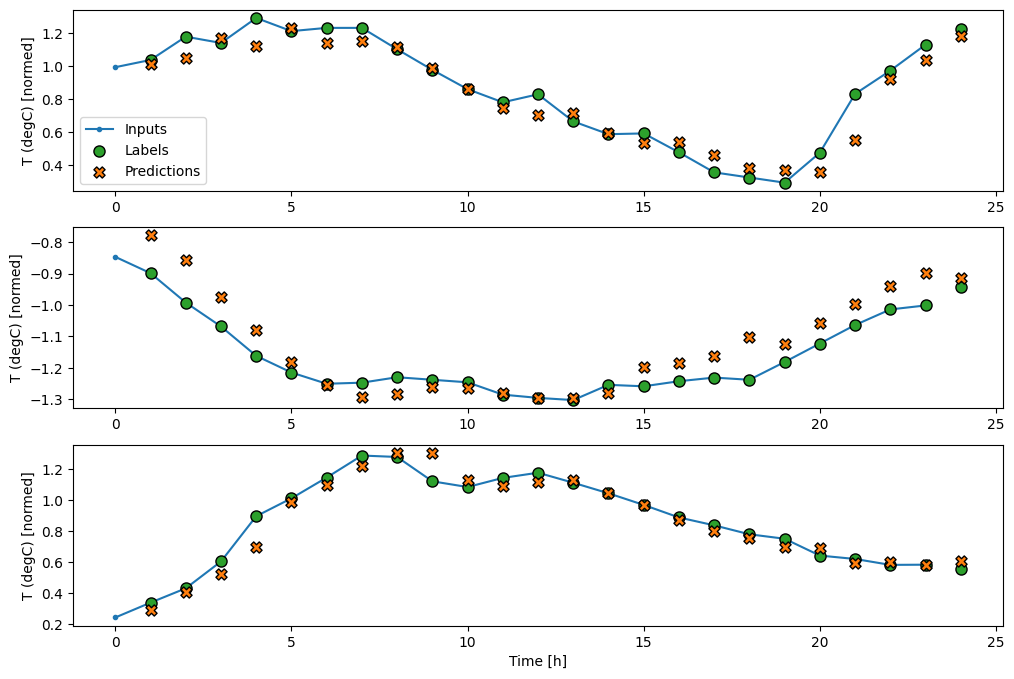

In [64]:
wide_window.plot(linear)

레이어의 가중치를 가져와 각 입력에 할당된 가중치를 시각화하였다.

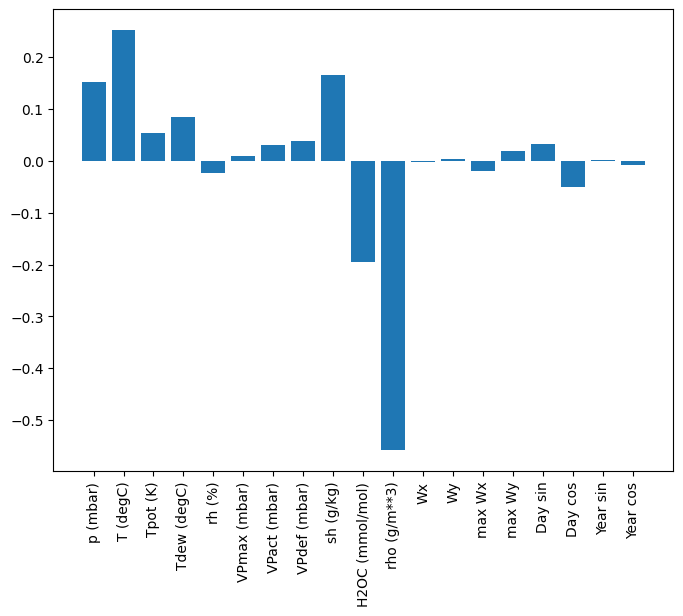

In [65]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## 다중 스텝 밀집

기존의 Linear 모델에 입력과 출력 사이에 몇 개의 Dense 레이어를 쌓아 모델의 성능을 확인한다.

In [66]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 14s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0813 - val_loss: 0.0081 - val_mean_absolute_error: 0.0656
Epoch 2/20
1534/1534 [==============================] - 12s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0646 - val_loss: 0.0074 - val_mean_absolute_error: 0.0622
Epoch 3/20
1534/1534 [==============================] - 12s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0625 - val_loss: 0.0075 - val_mean_absolute_error: 0.0620
Epoch 4/20
1534/1534 [==============================] - 12s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0614 - val_loss: 0.0070 - val_mean_absolute_error: 0.0597
Epoch 5/20
1534/1534 [==============================] - 13s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0601 - val_loss: 0.0068 - val_mean_absolute_error: 0.0575
Epoch 6/20
1534/1534 [==============================] - 12s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0593 - val_loss: 0.0065 - val_mean_absolute_error: 0.056

In [67]:
# 합성곱 신경망을 사용하기 위해 새로운 윈도우를 만들어주었다
# 3개의 연속된 시간 스텝을 입력으로 사용한다는 것이 기존의 모델과는 다른 점이다
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

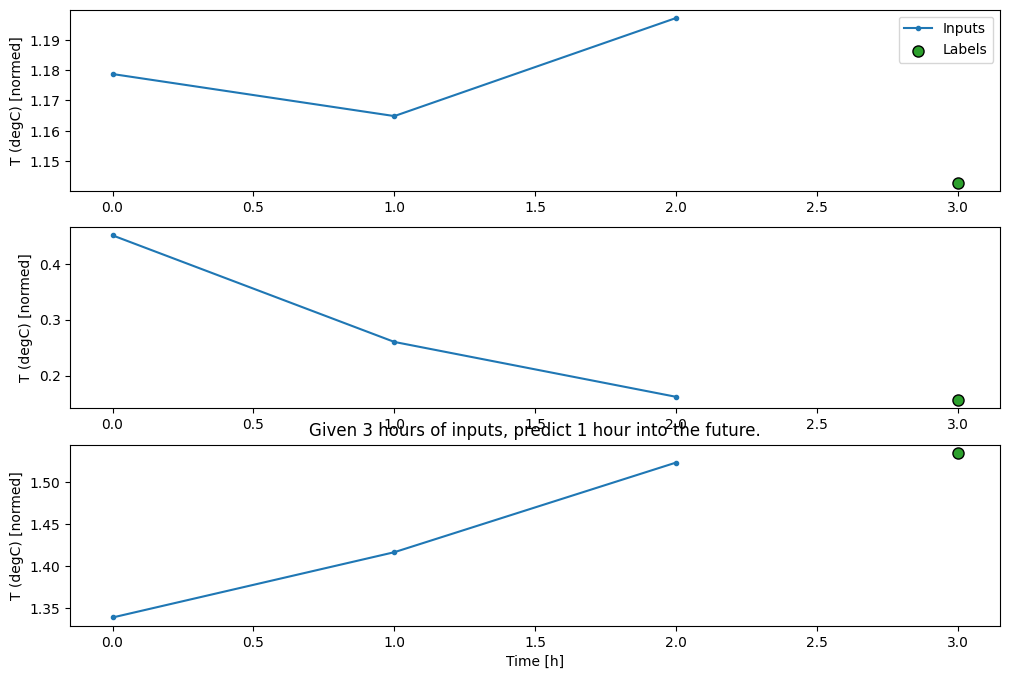

In [68]:
# 앞서 언급했듯 3개의 연속된 시간 스텝을 입력으로 사용하여 시각화하였다
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [69]:
# 다중 스텝 밀집 예측을 위한 밀집 신경망 모델 정의
multi_step_dense = tf.keras.Sequential([
    # 3D 입력을 1D로 평탄화
    tf.keras.layers.Flatten(),
    # 32개의 유닛과 ReLU 활성화 함수를 가진 첫 번째 밀집 레이어
    tf.keras.layers.Dense(units=32, activation='relu'),
    # 32개의 유닛과 ReLU 활성화 함수를 가진 두 번째 밀집 레이어
    tf.keras.layers.Dense(units=32, activation='relu'),
    # 1개의 유닛을 가진 출력 레이어
    tf.keras.layers.Dense(units=1),
    # 출력을 원하는 형태로 재구성하였다(1, 출력 개수)
    tf.keras.layers.Reshape([1, -1]),
])

In [70]:
# Input의 경우 시계열 데이터가 각각 3개의 시간 스텝을 가지고 있다.
# 모델은 다중 타입 스텝 예측을 수행하며, 각 시계열 데이터에 대해 하나의 시간 스텝과 특성을 가진 예측값을 출력한다
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [71]:
# 다중 스텝 밀집 모델을 컴파일하고 훈련시킨 후 성능을 평가한다
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output() # 훈련 출력 상황을 깔끔하게 표기해주는 메서드다
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0542


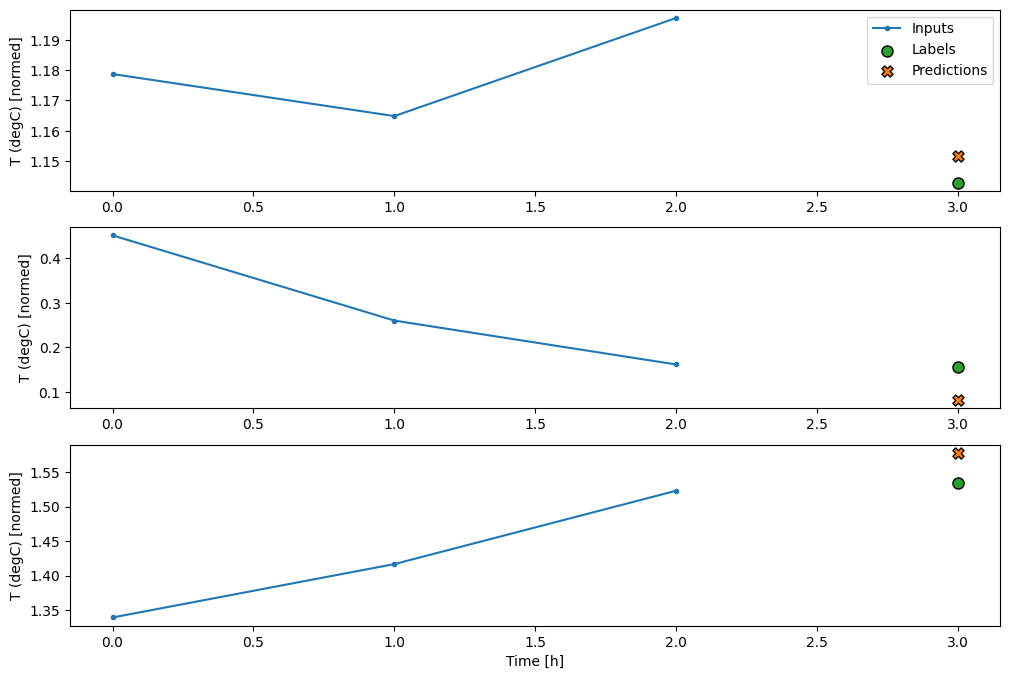

In [72]:
conv_window.plot(multi_step_dense)

Exception encountered when calling layer 'sequential_2' (type Sequential) 오류가 발생했고 다음 CNN 신경망 훈련을 통해 본 문제를 해결한다

In [73]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 19)

ValueError:Exception encountered when calling layer 'sequential_2' (type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 57, but received input with shape (32, 456)

Call arguments received by layer 'sequential_2' (type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 19), dtype=float32)
  • training=None
  • mask=None


## 컨볼루션 신경망
- CNN 1D 레이어를 활용하여 각 예측에 대한 입력으로 여러 타임 스텝을 사용한다
- 32개의 Filter를 통해 Feature를 추출한다
- 필터 사이즈는 3이다
- 활성화 함수로 ReLU를 사용한다
- 32개의 유닛을 가진 밀집 레이어로 구성되어 있다
- 1개의 출력 레이어를 통해 각 타임스텝에 대한 예측을 수행한다

In [74]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [75]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [76]:
# 모델을 컴파일하고 훈련, 평가한다
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0558


In [77]:
# 콘벌루션 레이어는 슬라이딩이 적용되어 더 넓은 출력이 생성된다
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [78]:
LABEL_WIDTH = 24
# 슬라이딩을 고려하여 입력 데이터를 가짐
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [79]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


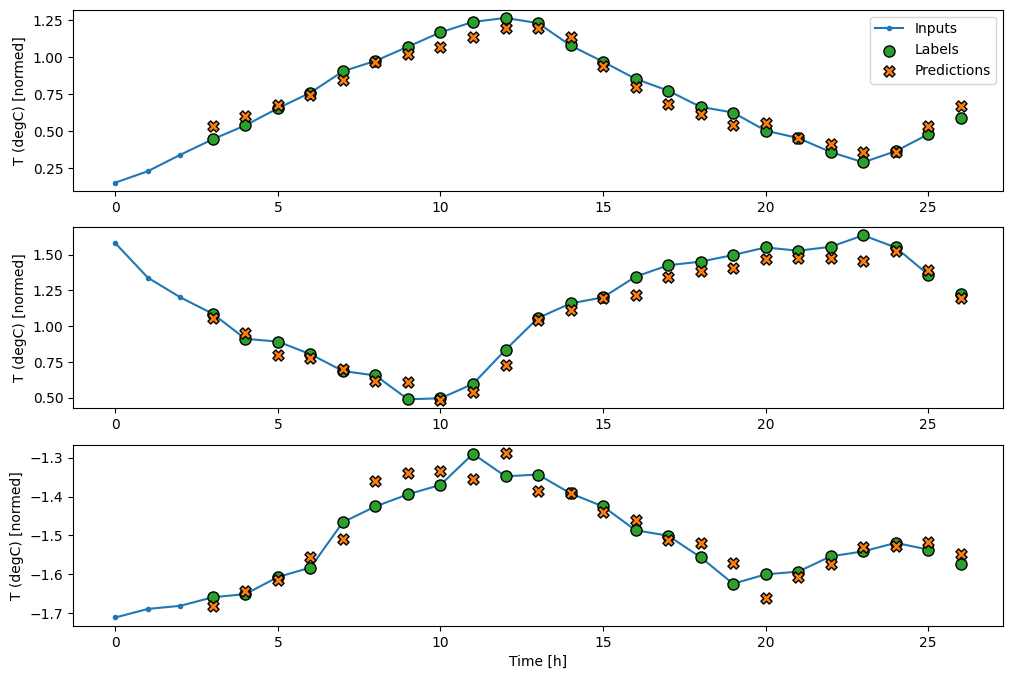

In [80]:
wide_conv_window.plot(conv_model)

## 순환 신경망

### LSTM

- 먼저 LSTM을 통해 모델을 학습한다.

In [81]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [82]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [83]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 2s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0525


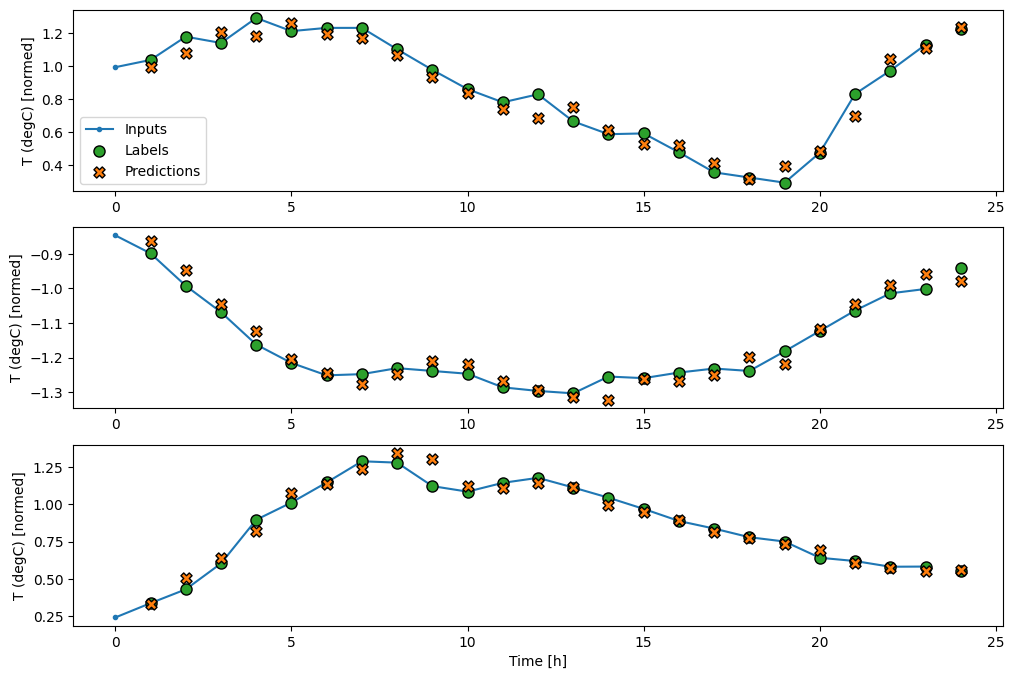

In [84]:
wide_window.plot(lstm_model)

### GRU

다음으로는 LSTM의 장점을 유지하면서 게이트 구조를 단순하게 만든 순환 신경망인 GRU를 통해 모델을 훈련, 평가한다.

In [85]:
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, gru_units]
    tf.keras.layers.GRU(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [86]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', gru_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [87]:
history = compile_and_fit(gru_model, wide_window)

IPython.display.clear_output()
val_performance['GRU'] = gru_model.evaluate(wide_window.val)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 2s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0519


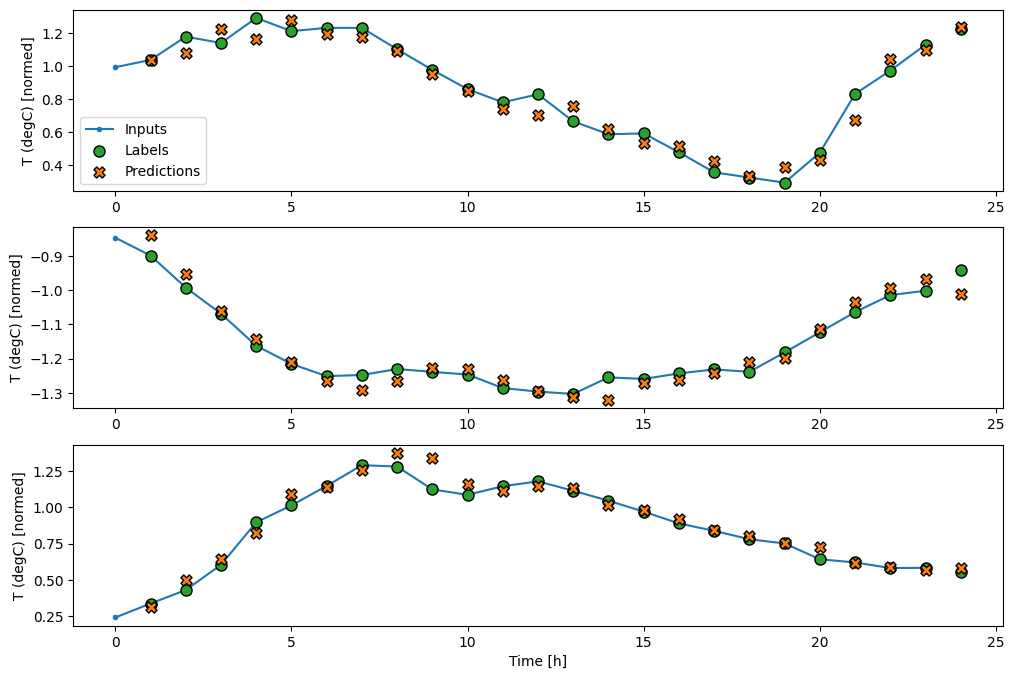

In [88]:
wide_window.plot(gru_model)

## 모델별 성능 평가

모델별 성능을 비교 분석하기 위해 하나로 모아 시각화하였다.

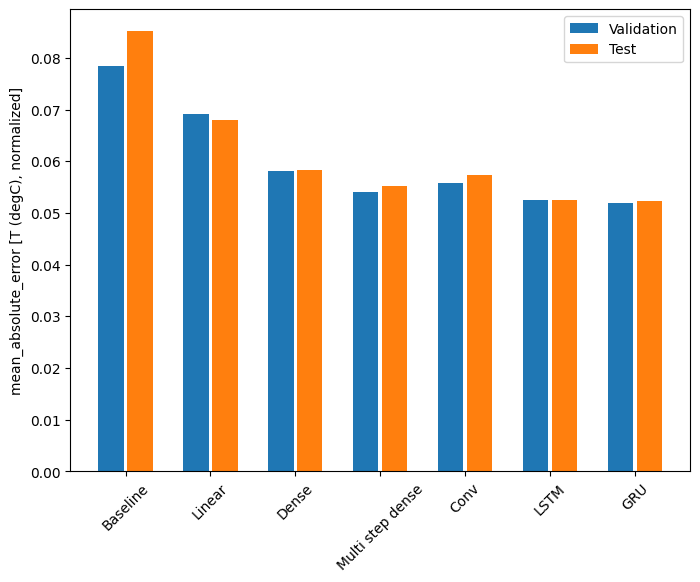

In [89]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = gru_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

본 평가의 기준이 된 척도가 MAE이기 때문에 MAE가 가장 낮은 값이 가장 좋은 모델인데, 학습 결과 GRU가 0.0524로 MAE가 가장 낮았고, 이는 곧 GRU 모델이 현재 설정에 따르면 가장 정확한 예측을 수행한 것으로 판단된다

In [90]:
# 모델별 성능을 출력해보았다.
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0852
Linear      : 0.0681
Dense       : 0.0583
Multi step dense: 0.0552
Conv        : 0.0573
LSTM        : 0.0525
GRU         : 0.0524


## 다중 출력 모델

다중 출력 모델(Multiple Output Model)을 다루기 전에 단일 출력 모델(Single Output Model)과 어떤 차이가 있는 개념에 대한 정리를 하겠다.
- 먼저 단일 출력 모델의 경우 하나의 출력만을 생성한다. 이는 곧 모델이 하나의 값을 예측하거나 혹은 클래스를 결정함을 의미한다
- 다중 출력 모델은 하나의 입력에 대해 여러 개의 독립적인 출력을 생성한다. 즉, 각 출력에 대한 손실 함수가 정의된다. 예를 들어 이미지 분류 문제에서 여러 개의 클래스에 대한 확률을 동시에 예측하는 것이 다중 출력 모델의 예다.

In [91]:
# 출력 결과에서 볼 수 있듯, 기존과 다르게 이제 레이블이 입력과 동일한 깊이를 갖는다. 형태가 (32,24,19)로 동일해졌다.
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1)

# 다중 출력을 위해 width가 확장되었다.
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


단일 출력 모델에서 했던 방식과 동일하게 다중 출력 모델을 만들어 Baseline부터 학습시켜주겠다.

### 다중 출력 모델 - Baseline

In [92]:
# 손실함수의 평가 척도는 MAE로 동일하다.
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [93]:
# 모델을 훈련하고, 평가를 진행한다
# 손실함수 값과 MAE 값에 대한 정리는 마지막에 출력되는 차트를 통해 한번에 정리한다
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 2s 3ms/step - loss: 0.0886 - mean_absolute_error: 0.1589


### 다중 출력 모델 - 다중 스텝 밀집

In [94]:
dense = tf.keras.Sequential([
    # Dense layer가 64개의 유닛과 활성화 함수는 ReLU로 구성되었다.
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [95]:
# 모델을 훈련하고 평가한다
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 3s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.1314


### 다중 출력 모델 - LSTM

In [96]:
%%time
# 24개의 타임 스텝을 입력과 레이블로 가지는 윈도우 생성
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

# LSTM 모델 정의
lstm_model = tf.keras.models.Sequential([
    # LSTM 레이어는 입력 시계열 데이터의 시간적 의존성을 캡쳐함
    tf.keras.layers.LSTM(32, return_sequences=True),
    # 출력 시퀀스의 각 타임 스텝에 대한 값을 예측
    tf.keras.layers.Dense(units=num_features)
])

# 모델 컴파일 및 학습
history = compile_and_fit(lstm_model, wide_window)

# 성능 측정
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

438/438 [==============================] - 2s 5ms/step - loss: 0.0616 - mean_absolute_error: 0.1209

CPU times: user 3min 57s, sys: 28.3 s, total: 4min 25s
Wall time: 4min 2s


### 다중 출력 모델 - GRU

In [97]:
%%time
# 24개의 타임 스텝을 입력과 레이블로 가지는 윈도우 생성
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

# GRU 모델 정의
gru_model = tf.keras.models.Sequential([
    # GRU 레이어는 입력 시계열 데이터의 시간적 의존성을 캡쳐함
    tf.keras.layers.GRU(32, return_sequences=True),
    # 출력 시퀀스의 각 타임 스텝에 대한 값을 예측
    tf.keras.layers.Dense(units=num_features)
])

# 모델 컴파일 및 학습
history = compile_and_fit(gru_model, wide_window)

# 성능 측정
IPython.display.clear_output()
val_performance['GRU'] = gru_model.evaluate(wide_window.val)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

print()

438/438 [==============================] - 2s 5ms/step - loss: 0.0618 - mean_absolute_error: 0.1205

CPU times: user 4min 27s, sys: 29.6 s, total: 4min 56s
Wall time: 5min


### 다중 출력 모델 - Residual GRU

모델이 기존 입력에 대한 잔차를 학습하도록 도와주는 기법이다. Residual connection을 통해 모델의 학습을 안정화시키고 속도를 향상시킬 수 있다.

In [133]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    return inputs + delta

In [134]:
%%time
# Residual Connection이 추가된 GRU 모델 정의
residual_gru_fixed = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        kernel_initializer=tf.initializers.zeros())
]))

# 모델 컴파일 및 학습
history = compile_and_fit(residual_gru_fixed, wide_window)

# 성능 측정
IPython.display.clear_output()
val_performance['Residual GRU'] = residual_gru_fixed.evaluate(wide_window.val)
performance['Residual GRU'] = residual_gru_fixed.evaluate(wide_window.test, verbose=0)
print()

438/438 [==============================] - 2s 5ms/step - loss: 0.0619 - mean_absolute_error: 0.1174

CPU times: user 1min 53s, sys: 13.2 s, total: 2min 6s
Wall time: 1min 56s


모델별 성능을 비교 분석하기 위해 하나로 모아 시각화하였다.

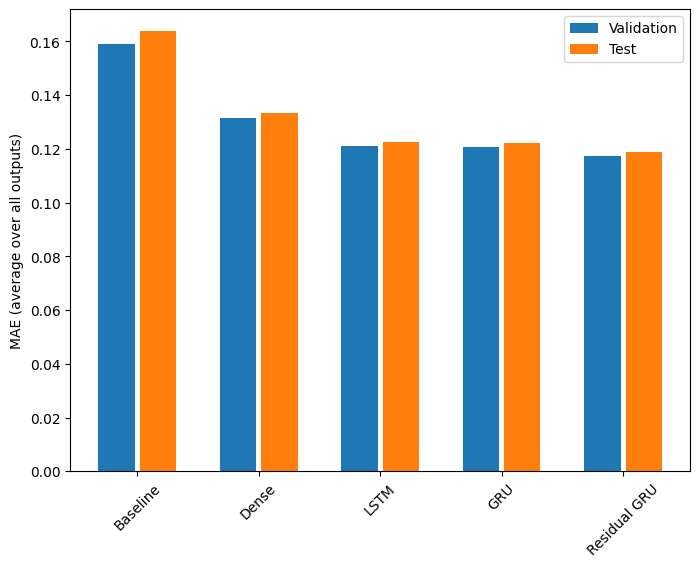

In [138]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = gru_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

기존의 네 모델에서도 GRU가 가장 성능이 좋지만(=MAE가 낮지만), 잔차 연결을 해준 Residual GRU의 경우 0.1186으로 MAE가 더 낮아졌다. 즉, Residual Connection을 통한 성능 개선이 이루어졌음을 확인할 수 있다.

In [139]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1638
Dense          : 0.1335
LSTM           : 0.1224
GRU            : 0.1221
Residual GRU   : 0.1186


# 7) 다중 스텝 모델을 싱글샷 컨볼루션 신경망, 순환 신경망, 자기 회귀 모델 등으로 구성하여 실행시켜보고 관련 설명을 주석으로 추가하시오

다중 스텝 모델(Multiple Step Model)은 특정 시점에서부터 미래 여러 스텝까지의 시계열 값을 동시에 예측하며, 각 스텝은 다음 값을 예측하는 것처럼 **시간에 따른 연속적인 값**들을 출력으로 갖는다.

과거의 24시간을 고려하여 미래의 24시간을 예측한다

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

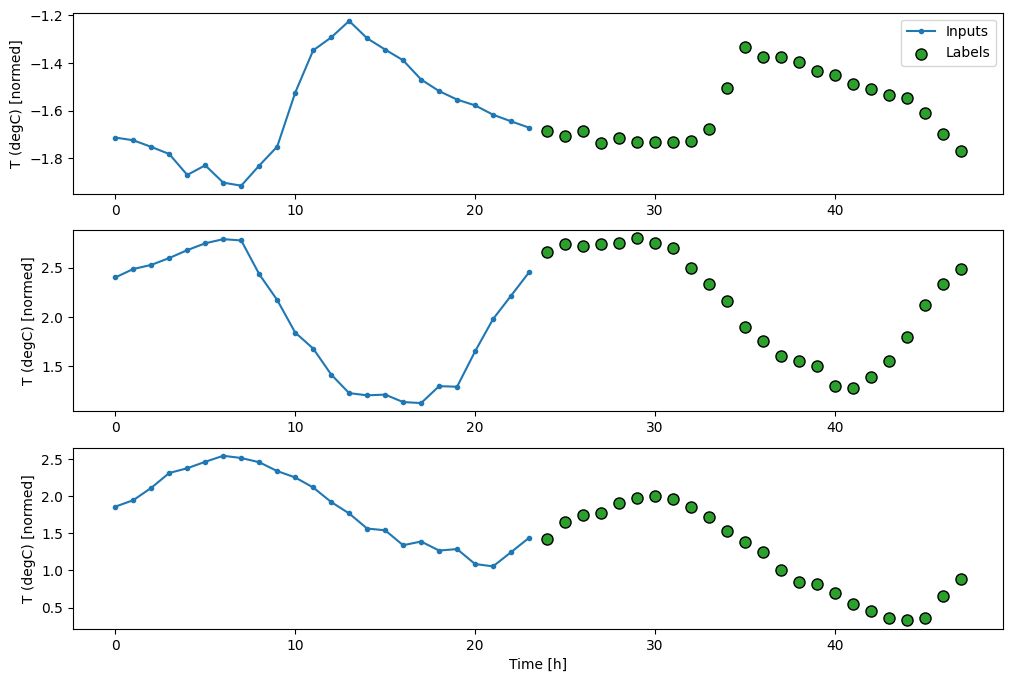

In [102]:
# 24개의 타임 스텝을 입력으로 사용하여 24개의 타임 스텝의 레이블을 예측하는 윈도우를 생성함을 의미한다
# 플롯을 통해 출력된 결과 역시 과거를 통해 미래의 하루를 예측하는 모습을 확인할 수 있다
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## 다중 스텝 모델 - Baseline
- Baseline 모델의 경우 이전 타임 스텝의 값을 현재 타임 스텝의 예측값으로 사용하는 단순한 방식을 채택하고 있으므로 모델이 시간적인 패턴이나 동적인 특성을 학습하지 못한다.
- 따라서 아래의 차트와 같이 복잡한 시계열 패턴을 읽어내지 못하고 단순한 직선 형태의 값이 출력되어 레이블과 굉장히 큰 오차를 보이고 있다

437/437 [==============================] - 3s 6ms/step - loss: 0.6285 - mean_absolute_error: 0.5007


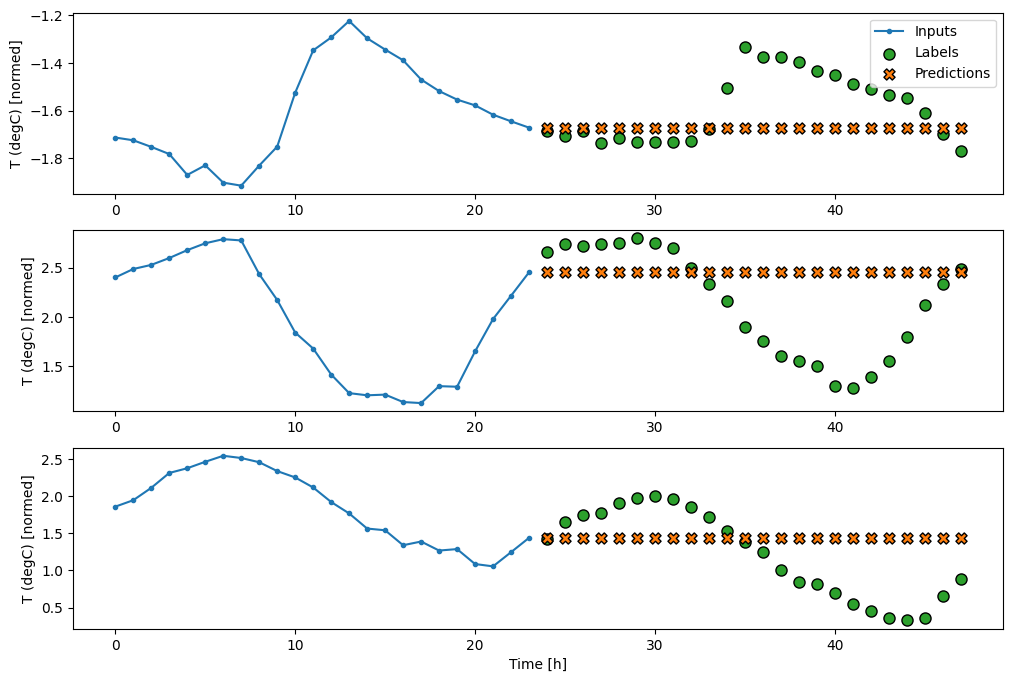

In [103]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

그러나 마지막 타임 스텝만 고려하는 것이 아니라 과거의 24시간을 모두 고려하게 되면 Baseline 모델도 상대적으로 우수한 prediction 값을 도출한다

437/437 [==============================] - 3s 6ms/step - loss: 0.4270 - mean_absolute_error: 0.3959


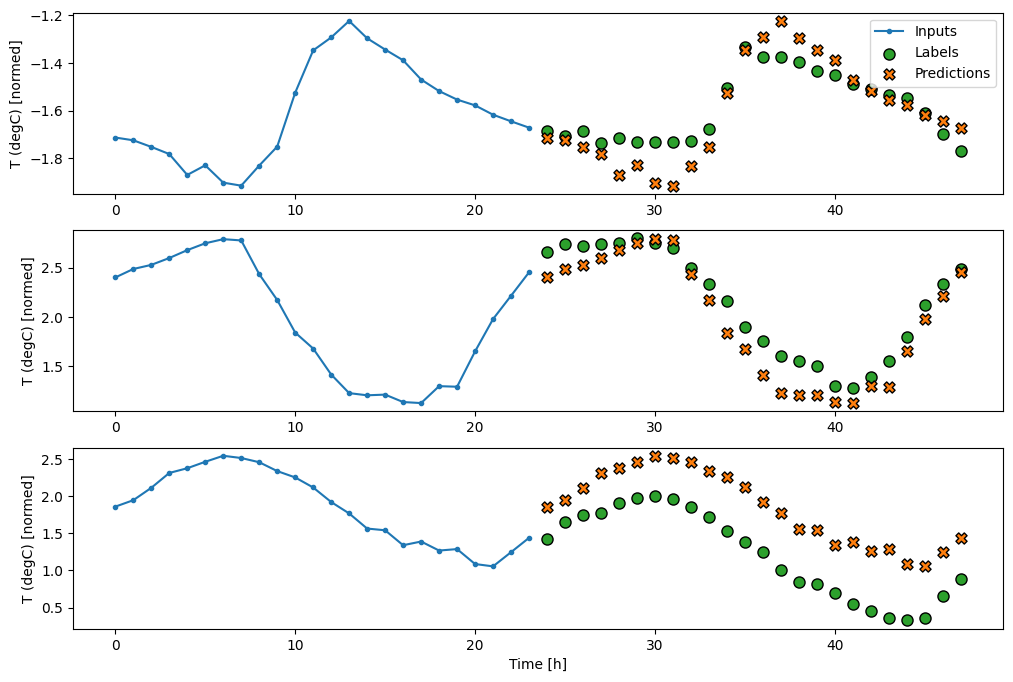

In [104]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

## 싱글샷 모델

싱글샷 모델은 모델이 한 번에 전체 시퀀스의 예측을 수행한다.

437/437 [==============================] - 2s 5ms/step - loss: 0.2557 - mean_absolute_error: 0.3056


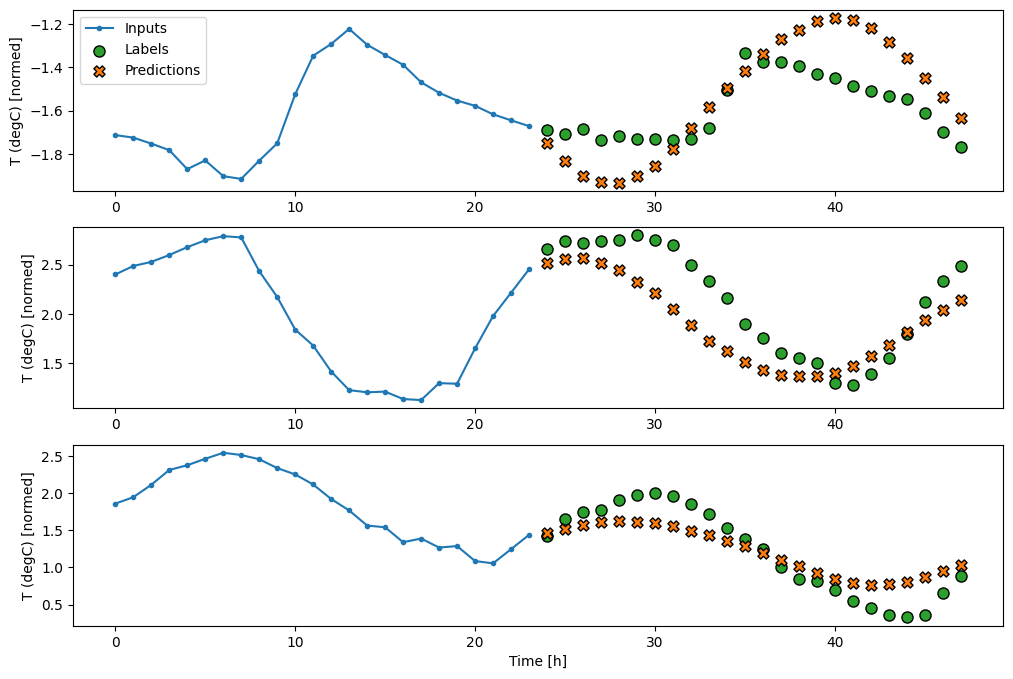

In [105]:
multi_linear_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### 다중 스텝 밀집

Dense layer를 추가하여 더 강한 선형 모델을 얻었으나 여전히 단일 입력에 기반하고 있다

437/437 [==============================] - 2s 4ms/step - loss: 0.2177 - mean_absolute_error: 0.2816


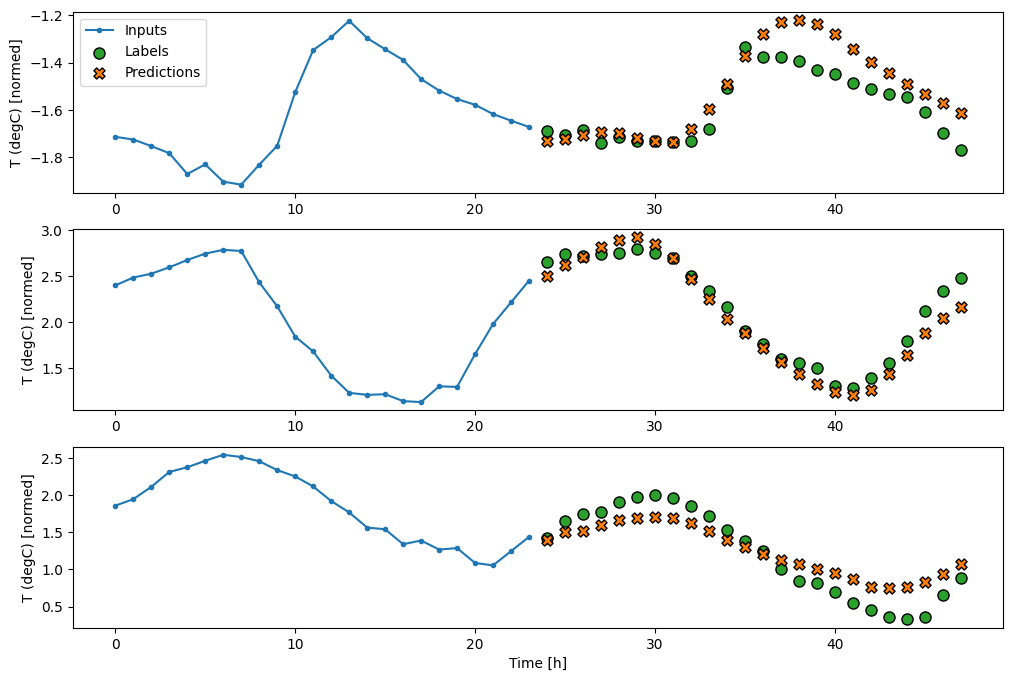

In [106]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### 콘벌루션 신경망

콘벌루션 모델은 width 기록을 기반으로 예측을 수행하므로 시간에 따라 상황이 어떻게 변하는지 볼 수 있어 기존 모델보다 성능을 높일 수 있다

437/437 [==============================] - 2s 4ms/step - loss: 0.2155 - mean_absolute_error: 0.2813


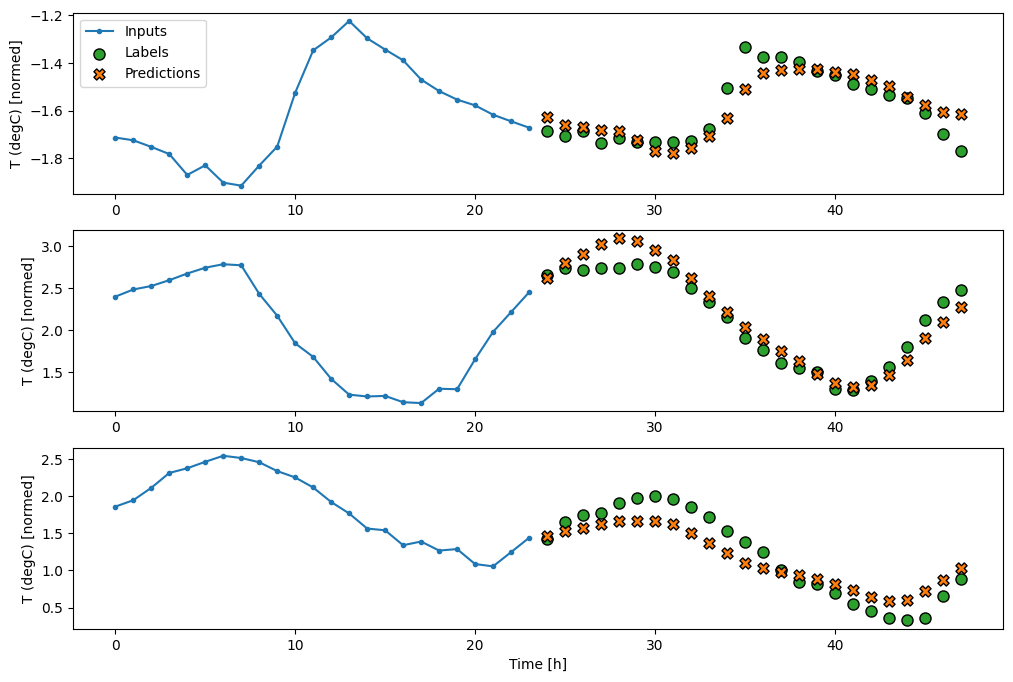

In [107]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### LSTM

437/437 [==============================] - 3s 6ms/step - loss: 0.2143 - mean_absolute_error: 0.2849


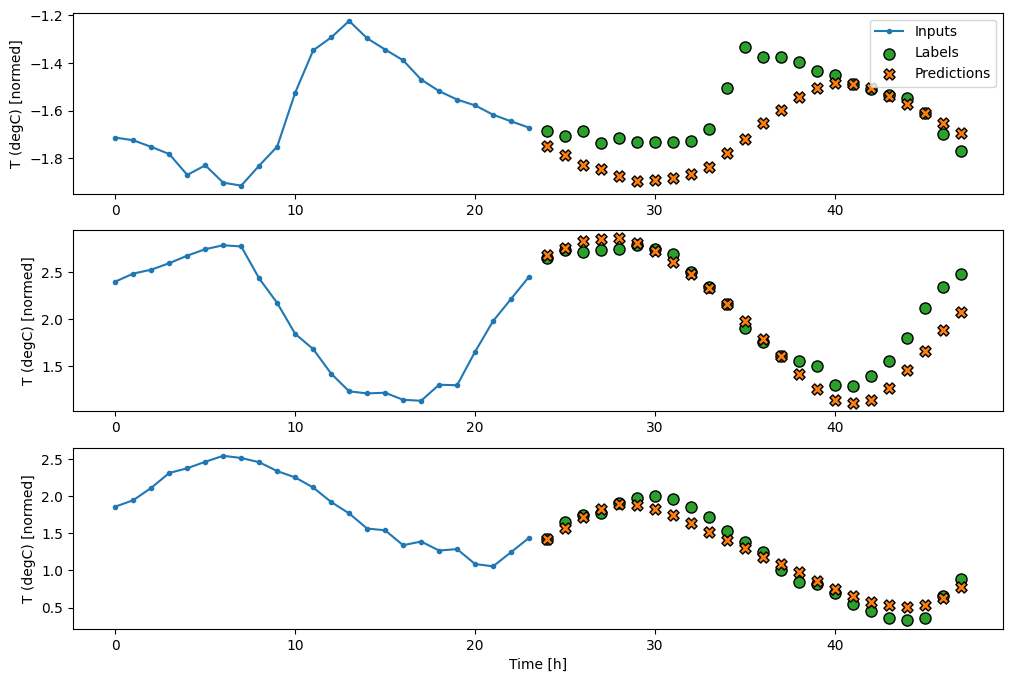

In [123]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### GRU

437/437 [==============================] - 2s 4ms/step - loss: 0.2127 - mean_absolute_error: 0.2829


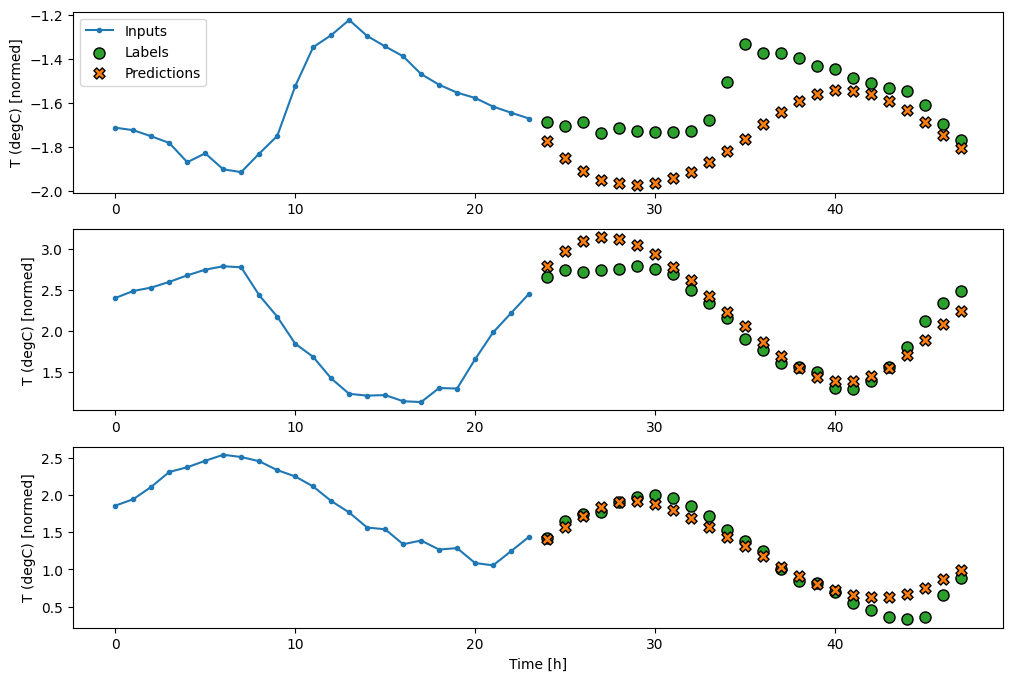

In [124]:
multi_gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_gru_model, multi_window)

IPython.display.clear_output()

multi_val_performance['GRU'] = multi_gru_model.evaluate(multi_window.val)
multi_performance['GRU'] = multi_gru_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_gru_model)

## 다중 스텝 모델 - 자기 회귀 모델

자기 회귀 모델은 이전 시간 단계의 자기회귀 항만을 사용하여 현재 값을 예측한다. 모델의 정상성이 중요하며, 현재의 값을 예측하기 위해 이전 시간 단계의 자신을 사용하는 개념이다.

분석에 사용할 자기 회귀 RNN 모델을 설계한다

In [110]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    # LSTM 셀의 뉴런 수와 예측 스텝 수 설정
    self.out_steps = out_steps
    self.units = units
    # LSTM 셀과 RNN 레이어 초기화
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    # Fully Connected 레이어 초기화
    self.dense = tf.keras.layers.Dense(num_features)

In [111]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [112]:
def warmup(self, inputs):
  x, *state = self.lstm_rnn(inputs)

  # 초기 예측 결과 생성
  prediction = self.dense(x)
  return prediction, state

# FeedBack 클래스에 warmup 메서드 추가
FeedBack.warmup = warmup

In [113]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 19])

In [114]:
def call(self, inputs, training=None):
  predictions = []
  prediction, state = self.warmup(inputs)

  predictions.append(prediction)

  # 루프를 통한 추가적인 스텝에 대한 예측 수행
  for n in range(1, self.out_steps):
    x = prediction
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    prediction = self.dense(x)
    predictions.append(prediction)

  # 예측 결과를 쌓아 반환
  predictions = tf.stack(predictions)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [115]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


437/437 [==============================] - 8s 17ms/step - loss: 0.2238 - mean_absolute_error: 0.2972


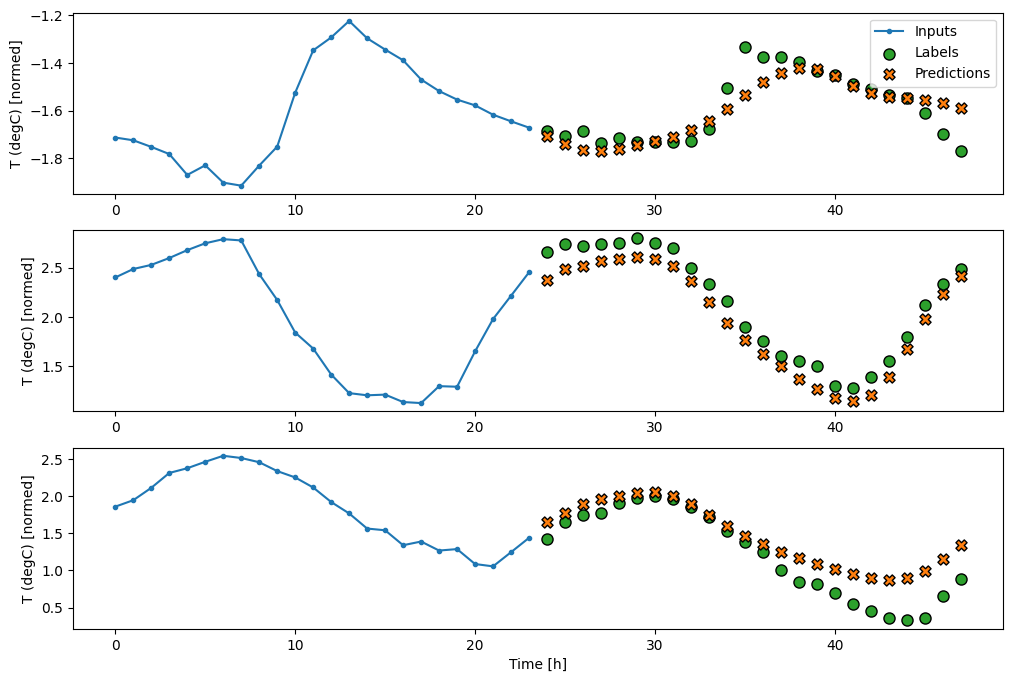

In [116]:
# 모델을 훈련, 평가함
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## 성능 평가

모델별 성능을 비교 분석하기 위해 하나로 모아 시각화하였다.

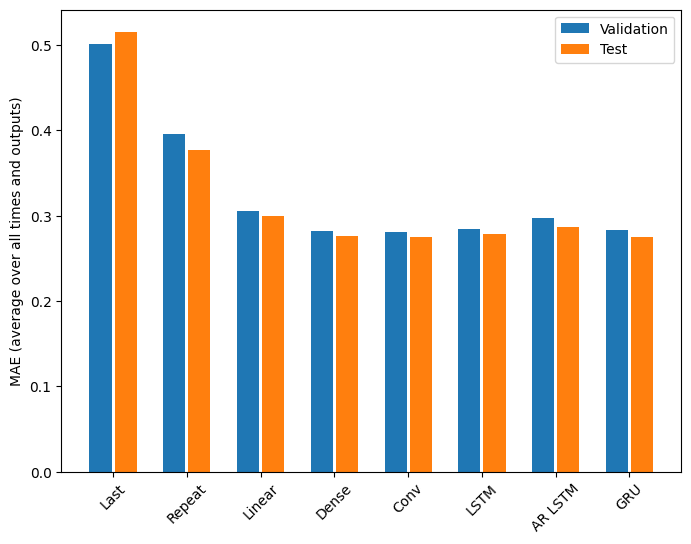

In [125]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = gru_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

학습 결과 CONV가 0.2745로 MAE가 가장 낮았고, 이는 곧 CONV 모델이 현재 설정에 따르면 가장 정확한 예측을 수행한 것으로 판단된다

In [130]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.5157
Repeat  : 0.3774
Linear  : 0.2991
Dense   : 0.2759
Conv    : 0.2745
LSTM    : 0.2779
AR LSTM : 0.2869
GRU     : 0.2755
